In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("NetflixUserbase.csv")
df

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
df.Country
freq = dict()
for Country in df.Country.tolist():
    if Country in freq.keys():
        freq[Country] += 1
    else:
        freq[Country] = 1

freq

{'United States': 451,
 'Canada': 317,
 'United Kingdom': 183,
 'Australia': 183,
 'Germany': 183,
 'France': 183,
 'Brazil': 183,
 'Mexico': 183,
 'Spain': 451,
 'Italy': 183}

In [ ]:
from tabulate import tabulate

freq_list = [(k,freq[k]) for k in freq.keys()]

print(tabulate(freq_list, headers=["Country","Frequência"], tablefmt = "simple_grid"))

┌────────────────┬──────────────┐
│ Country        │   Frequência │
├────────────────┼──────────────┤
│ United States  │          451 │
├────────────────┼──────────────┤
│ Canada         │          317 │
├────────────────┼──────────────┤
│ United Kingdom │          183 │
├────────────────┼──────────────┤
│ Australia      │          183 │
├────────────────┼──────────────┤
│ Germany        │          183 │
├────────────────┼──────────────┤
│ France         │          183 │
├────────────────┼──────────────┤
│ Brazil         │          183 │
├────────────────┼──────────────┤
│ Mexico         │          183 │
├────────────────┼──────────────┤
│ Spain          │          451 │
├────────────────┼──────────────┤
│ Italy          │          183 │
└────────────────┴──────────────┘


In [ ]:
bins = [25, 30, 35, 40, 45, 50, 55]
df["age_faixas"] = pd.cut(df.Age, bins=bins, right=False)
freq = df["age_faixas"].value_counts().sort_index()
freq_list = [(k,freq[k]) for k in freq.keys()]

print(tabulate(freq_list, headers=["Faixa de Idade", "Frequência"], tablefmt="simple_grid"))
freq

┌──────────────────┬──────────────┐
│ Faixa de Idade   │   Frequência │
├──────────────────┼──────────────┤
│ [25, 30)         │          307 │
├──────────────────┼──────────────┤
│ [30, 35)         │          504 │
├──────────────────┼──────────────┤
│ [35, 40)         │          516 │
├──────────────────┼──────────────┤
│ [40, 45)         │          499 │
├──────────────────┼──────────────┤
│ [45, 50)         │          497 │
├──────────────────┼──────────────┤
│ [50, 55)         │          177 │
└──────────────────┴──────────────┘


[25, 30)    307
[30, 35)    504
[35, 40)    516
[40, 45)    499
[45, 50)    497
[50, 55)    177
Name: age_faixas, dtype: int64

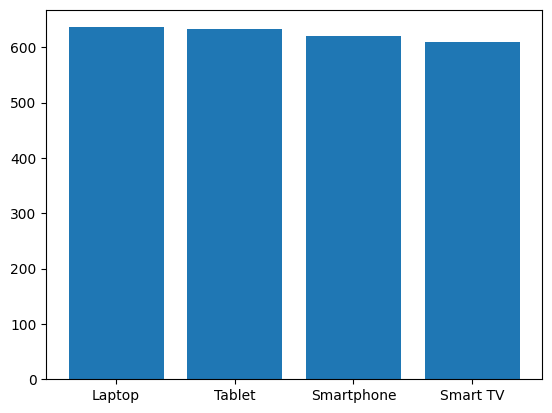

In [ ]:
from matplotlib import pyplot as plt
x = list(df['Device'].value_counts().index)
height = list(df['Device'].value_counts())
plt.bar(x,height)
plt.show()

In [ ]:
subscription_counts = df['Subscription_Type'].value_counts()
subscription_porcentages = (subscription_counts / subscription_counts.sum()) * 100
subscription_summary = pd.DataFrame({'Subscription_Type': subscription_porcentages.index, 'Porcentage': subscription_porcentages.values})

print(subscription_summary)

  Subscription_Type  Porcentage
0             Basic       39.96
1          Standard       30.72
2           Premium       29.32


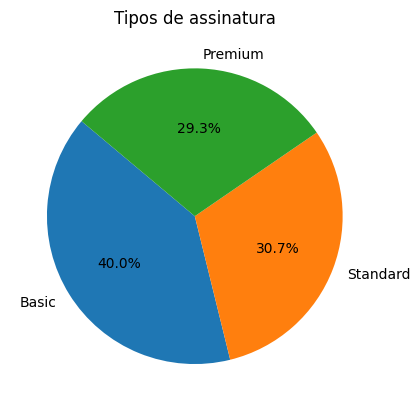

In [ ]:
plt.pie(subscription_summary['Porcentage'], labels=subscription_summary['Subscription_Type'], autopct='%1.1f%%', startangle=140)
plt.title('Tipos de assinatura')
plt.show()